In [3]:
%load_ext autoreload
%autoreload 2
import _pathmagic
import pandas as pd
# from acanogan import acanogan_model,acanogan_predict, acanogan_test
from sklearn import metrics
import matplotlib.pyplot as plt
# import scikitplot as skplt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# load data
normal_w_0=pd.read_csv("../output/experiments/score/5032AB_test_normal_w=0.csv",index_col=0,header=None,names=["score"])
normal_w_01=pd.read_csv("../output/experiments/score/5032AB_test_normal_w=0.1.csv",index_col=0,header=None,names=["score"])
normal_w_05=pd.read_csv("../output/experiments/score/5032AB_test_normal_w=0.5.csv",index_col=0,header=None,names=["score"])
normal_w_1=pd.read_csv("../output/experiments/score/5032AB_test_normal_w=1.csv",index_col=0,header=None,names=["score"])

anomaly_w_0=pd.read_csv("../output/experiments/score/5032AB_test_anomaly_w=0.csv",header=None,index_col=0,names=["score"])
anomaly_w_01=pd.read_csv("../output/experiments/score/5032AB_test_anomaly_w=0.1.csv",header=None,index_col=0,names=["score"])
anomaly_w_05=pd.read_csv("../output/experiments/score/5032AB_test_anomaly_w=0.5.csv",header=None,index_col=0,names=["score"])
anomaly_w_1=pd.read_csv("../output/experiments/score/5032AB_test_anomaly_w=1.csv",header=None,index_col=0,names=["score"])

def make_roc_dataset(normal,anomaly):
    normal["y"]=0
    anomaly["y"]=1
    roc_dataset=pd.concat([normal,anomaly])
    return roc_dataset
roc_dataset_w0=make_roc_dataset(normal_w_0,anomaly_w_0)
roc_dataset_w01=make_roc_dataset(normal_w_01,anomaly_w_01)
roc_dataset_w05=make_roc_dataset(normal_w_05,anomaly_w_05)
roc_dataset_w1=make_roc_dataset(normal_w_1,anomaly_w_1)

In [9]:
# fpr:偽陽性率，tpr:sensitivity(再現率)
fpr_w0, tpr_w0, thres_w0 = metrics.roc_curve(roc_dataset_w0.y.to_list(),roc_dataset_w0.score.to_list())
fpr_w01, tpr_w01, thres_w01 = metrics.roc_curve(roc_dataset_w01.y.to_list(),roc_dataset_w01.score.to_list())
fpr_w05, tpr_w05, thres_w05 = metrics.roc_curve(roc_dataset_w05.y.to_list(),roc_dataset_w05.score.to_list())
fpr_w1, tpr_w1, thres_w1 = metrics.roc_curve(roc_dataset_w1.y.to_list(),roc_dataset_w1.score.to_list())
print('auc_w0:', metrics.auc(fpr_w0, tpr_w0))
print('auc_w0.1:', metrics.auc(fpr_w01, tpr_w01))
print('auc_w0.5:', metrics.auc(fpr_w05, tpr_w05))
print('auc_w1:', metrics.auc(fpr_w1, tpr_w1))


auc_w0: 0.7284688995215312
auc_w0.1: 0.7711893369788108
auc_w0.5: 0.7383800410116199
auc_w1: 0.7243677375256323


In [18]:
def cutoff(roc_dataset,tpr,fpr,thresholds):
    """

    Args:
        fpr: 
        tpr: 
        thresholds: 

    Returns:
        fpr[cutoff_index],tpr[cutoff_index],precision,recall,specificity,f1_score
    """
    # tpr-fprが最大となる点が最適な閾値
    cutoff_criterion = tpr-fpr
    cutoff_index=cutoff_criterion.argmax()
    
    pred_label = (roc_dataset["score"] > thresholds[cutoff_index]).astype(int)
    tn, fp, fn, tp = metrics.confusion_matrix(roc_dataset["y"], pred_label, ).ravel()
    # recall=tp/(tp+fn)
    # precision=tp/(tp+fp)
    precision=metrics.precision_score(roc_dataset["y"],pred_label)
    recall=metrics.recall_score(roc_dataset["y"],pred_label)
    specificity=tn/(tn+fp)
    f1_score=metrics.f1_score(roc_dataset["y"],pred_label)
    return fpr[cutoff_index],tpr[cutoff_index],precision,recall,specificity,f1_score

# calc cutoff point
cutoff_result_w0=cutoff(roc_dataset_w0,tpr_w0,fpr_w0,thres_w0)
cutoff_point_w0=cutoff_result_w0[0:2]
print(f"w0 :{cutoff_result_w0}")

cutoff_result_w01=cutoff(roc_dataset_w01,tpr_w01,fpr_w01,thres_w01)
cutoff_point_w01=cutoff_result_w01[0:2]
print(f"w01:{cutoff_result_w01}")

cutoff_result_w05=cutoff(roc_dataset_w05,tpr_w05,fpr_w05,thres_w05)
cutoff_point_w05=cutoff_result_w05[0:2]
print(f"w05:{cutoff_result_w05}")

cutoff_result_w1=cutoff(roc_dataset_w1,tpr_w1,fpr_w1,thres_w1)
cutoff_point_w1=cutoff_result_w1[0:2]
print(f"w1 :{cutoff_result_w1}")

w0 :(0.16883116883116883, 0.5526315789473685, 0.7592592592592593, 0.5394736842105263, 0.8311688311688312, 0.6307692307692309)
w01:(0.23376623376623376, 0.7105263157894737, 0.7464788732394366, 0.6973684210526315, 0.7662337662337663, 0.7210884353741497)
w05:(0.2597402597402597, 0.6842105263157895, 0.7183098591549296, 0.6710526315789473, 0.7402597402597403, 0.6938775510204082)
w1 :(0.4025974025974026, 0.7763157894736842, 0.651685393258427, 0.7631578947368421, 0.5974025974025974, 0.703030303030303)


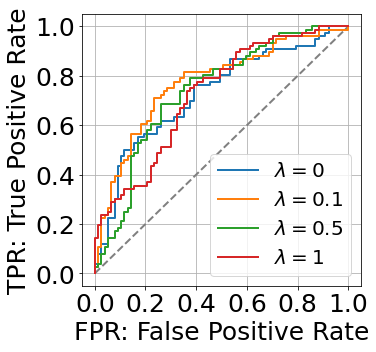

In [12]:
plt.figure(figsize = (5, 5))
plt.rcParams["font.size"] = 25
plt.xlabel('FPR: False Positive Rate')
plt.ylabel('TPR: True Positive Rate')
plt.grid()
plt.rcParams["font.size"] = 20
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.plot([0, 1], [0, 1], color='gray', lw=2,linestyle='--')
plt.plot(fpr_w0, tpr_w0, lw=2,label="$\lambda=0$")
plt.plot(fpr_w01, tpr_w01, lw=2,label="$\lambda=0.1$")
plt.plot(fpr_w05, tpr_w05, lw=2,label="$\lambda=0.5$")
plt.plot(fpr_w1, tpr_w1, lw=2,label="$\lambda=1$")
plt.legend()
plt.show()

